In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

from skimage import io
from skimage import feature
import cv2

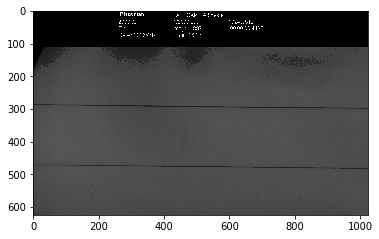

In [2]:
img = cv2.imread('new_data/parachute.tif') 
imgplot = plt.imshow(img)

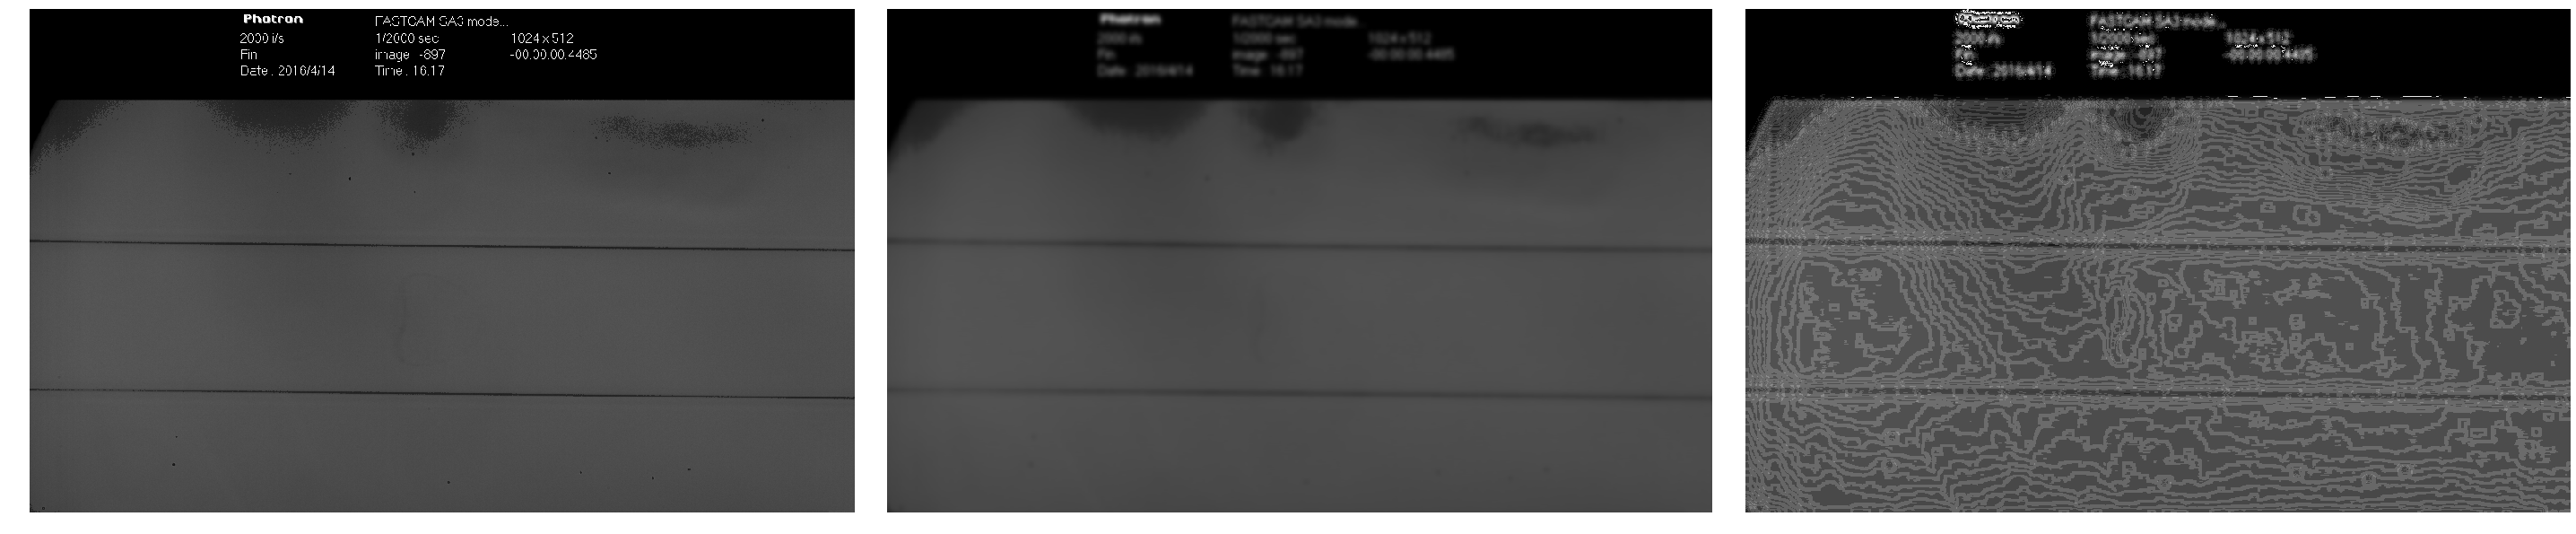

In [3]:
blurred_f = ndimage.gaussian_filter(img, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(40, 40))

plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
edges = feature.canny(img,sigma=3)
io.imshow(edges)
io.show()

ValueError: The parameter `image` must be a 2-dimensional array

In [5]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

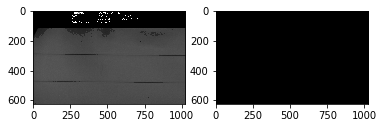

<Figure size 2880x2880 with 0 Axes>

In [6]:
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
plt.figure(figsize=(40, 40))
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.sobel(sharpened)
ax1.imshow(img)
ax2.imshow(result)
plt.show()

* Pas la même orientation selon les images
* Tube pas placé de la même manière : passer un sobel/canny sur les y pour éliminer les parois du tube ?

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
# threshold to get just the signature
retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

# find where the signature is and make a cropped region
points = np.argwhere(thresh_gray==0) # find where the black pixels are
points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
crop = img[y:y+h, x:x+w]
cv2.imshow('save.jpg', crop)

In [8]:
im = cv2.imread('new_data/parachute.tif')
im.shape

(624, 1024, 3)

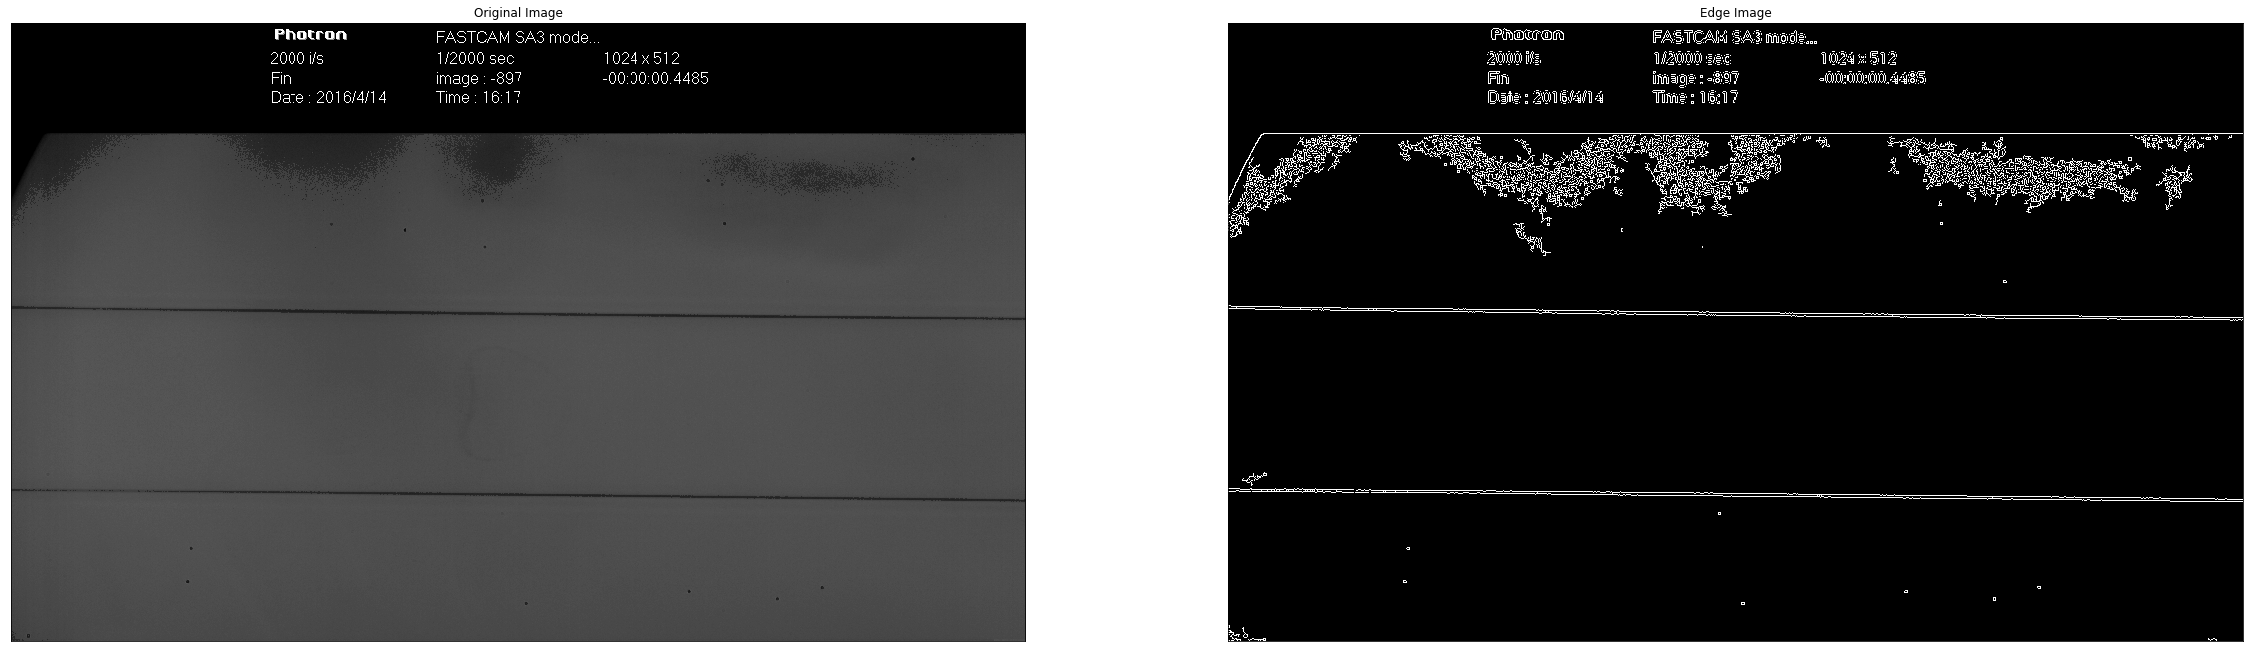

In [9]:
img = cv2.imread("new_data/parachute.tif",0)
edges = cv2.Canny(img,0,50)
plt.figure(figsize=(40, 40))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

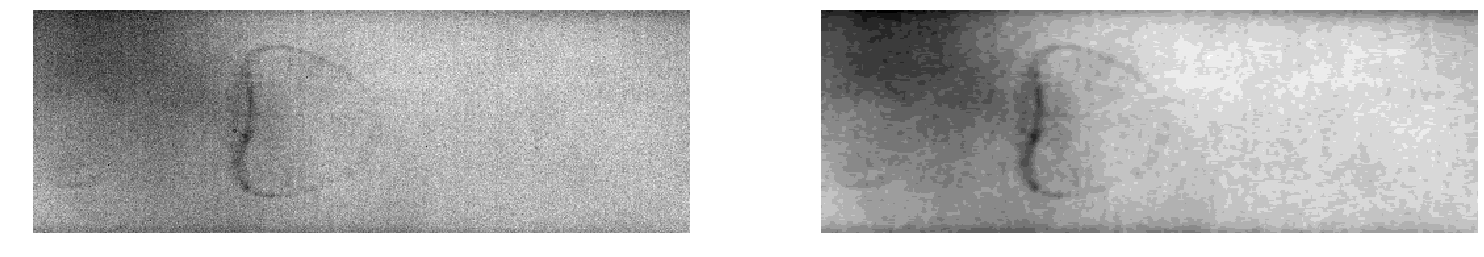

In [10]:
imgTocrop = cv2.imread("new_data/parachute.tif",0)
crop_img = imgTocrop[300:470, 300:800]
blurred_crop = ndimage.gaussian_filter(crop_img, 1.4)
plt.figure(figsize=(40, 40))

plt.subplot(131)
plt.imshow(crop_img, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.imshow(blurred_crop, cmap=plt.cm.gray)
plt.axis('off')


plt.show()

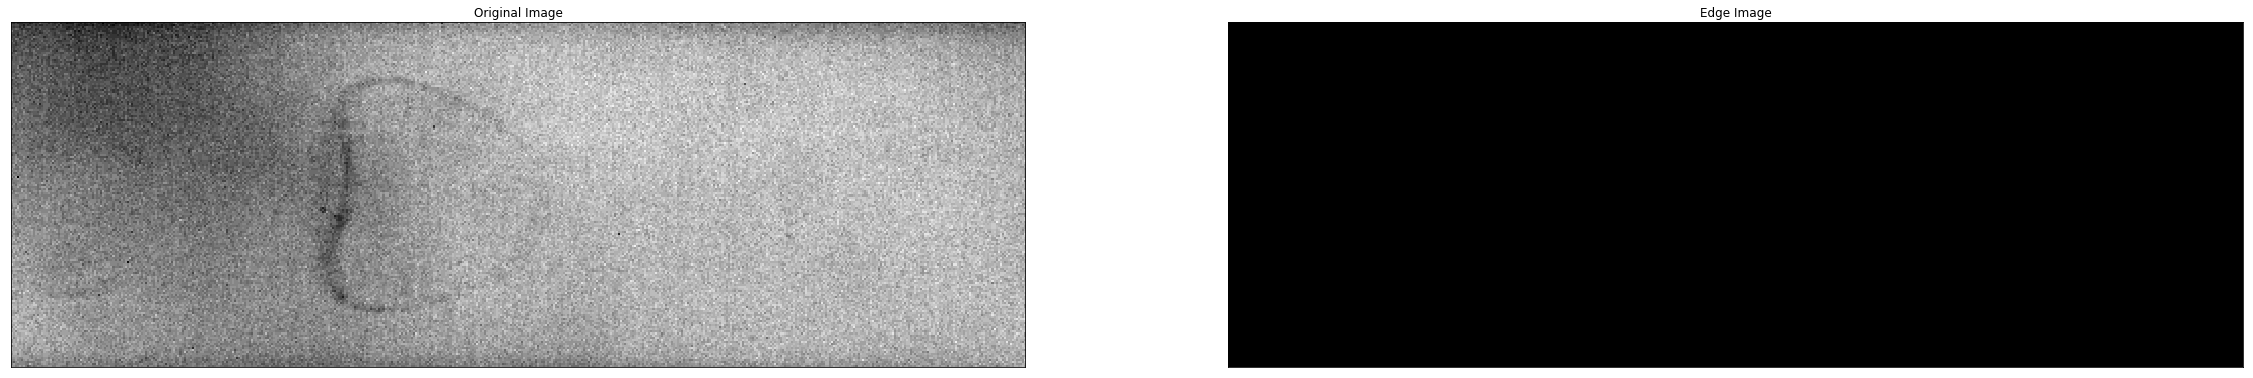

In [11]:
edges = cv2.Canny(blurred_crop,100,200)


plt.figure(figsize=(40, 40))

plt.subplot(121),
plt.imshow(crop_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.show()

* Modes propres
* Faire varier paramètres Canny
* Augmenter contraste
* Matching template openCV

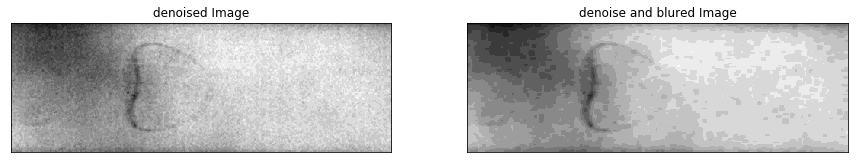

In [12]:
denoised_gray = cv2.fastNlMeansDenoising(crop_img, None, 2, 7,3)

blurreddenoised_crop = ndimage.gaussian_filter(denoised_gray, 0.8)

plt.figure(figsize=(15, 15))

# plt.subplot(121)
# plt.imshow(crop_img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(121)
plt.imshow(denoised_gray,cmap="gray")
plt.title('denoised Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(blurreddenoised_crop, cmap=plt.cm.gray)
plt.title('denoise and blured Image'), plt.xticks([]), plt.yticks([])


plt.show()

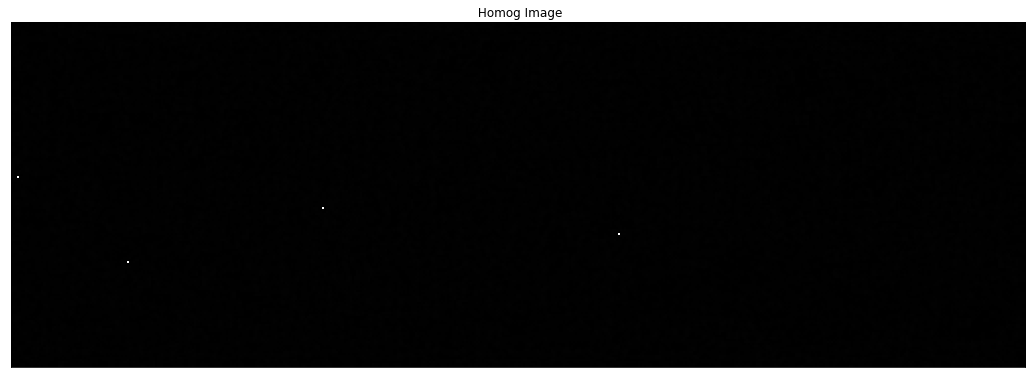

In [13]:
homo_img = denoised_gray - blurreddenoised_crop
plt.figure(figsize=(40,40))
plt.subplot(121)
plt.imshow(homo_img,cmap="gray")
plt.title(' Homog Image'), plt.xticks([]), plt.yticks([])
plt.show()

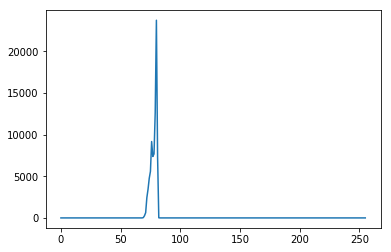

In [14]:
histg = cv2.calcHist([blurreddenoised_crop],[0],None,[256],[0,256])  
plt.plot(histg) 
plt.show() 

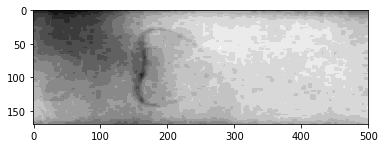

In [15]:
output = cv2.normalize(blurreddenoised_crop, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(output, cmap='gray')
plt.show()

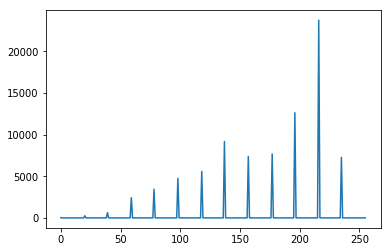

In [16]:
histgg = cv2.calcHist([output],[0],None,[256],[0,256])  
plt.plot(histgg) 
plt.show() 

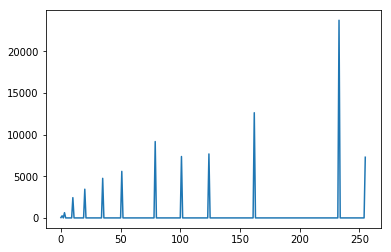

In [17]:
equ = cv2.equalizeHist(blurreddenoised_crop)
equ = cv2.normalize(equ, None, 0, 255, cv2.NORM_MINMAX)
histge = cv2.calcHist([equ],[0],None,[256],[0,256])  
plt.plot(histge) 
plt.show() 


 	
> Normalize Vs Equalize
They both produce similar results but use different techniques. The normalize is quite simple, it looks for the maximum intensity pixel (we will use a grayscale example here) and a minimum intensity and then will determine a factor that scales the min intensity to black and the max intensity to white. This is applied to every pixel in the image which produces the final result. 
The equalize will attempt to produce a histogram with equal amounts of pixels in each intensity level. This can produce unrealistic images since the intensities can be radically distorted but can also produce images very similar to normalization which preserves relative levels which the equalization process does not. 
So if you are concerned about keep an image realistic then use normalization, but if you want a more even distribution of intensity levels then equalize can help with that. 

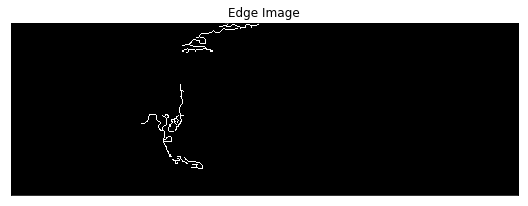

In [18]:
edges = cv2.Canny(output,70,190)


plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.show()

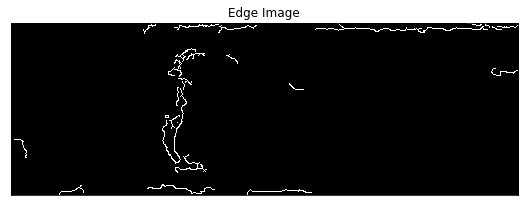

In [52]:
edges = cv2.Canny(equ2,80,200)


plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.show()

### Adaptative histogram equalization
> image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

In [24]:
def showImg(img,titre):
    plt.figure(figsize=(20, 20))
    plt.subplot(121)
    plt.imshow(img,cmap = 'gray')
    plt.title(titre), plt.xticks([]), plt.yticks([])
    plt.show()


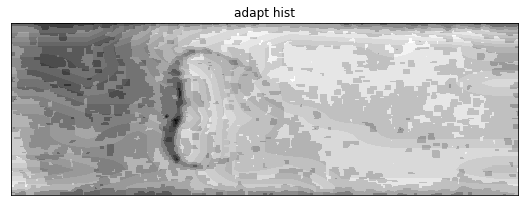

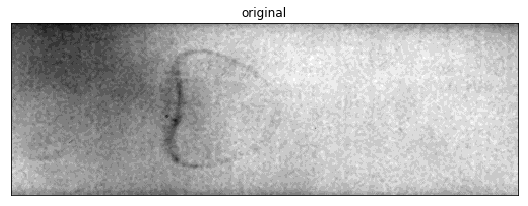

In [46]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
cl1 = clahe.apply(blurreddenoised_crop)
showImg(cl1,"adapt hist")
showImg(denoised_gray,"original")

blurreddenoised vs denoised gray

In [1]:
denoised_gray2 = cv2.fastNlMeansDenoising(cl1, None, 2, 2)
showImg(denoised_gray2,"")

NameError: name 'cv2' is not defined

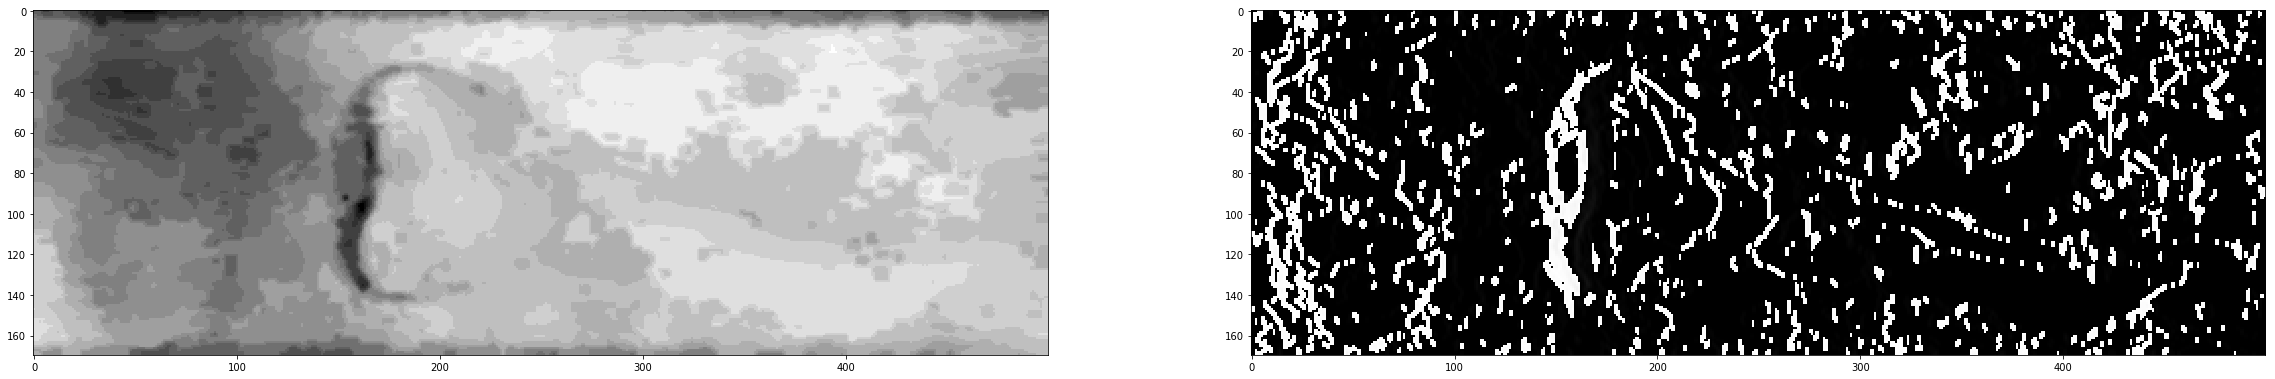

In [61]:
fig = plt.figure(figsize=(40,40))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.sobel(denoised_gray2)
ax1.imshow(equ2)
ax2.imshow(result)
plt.show()

https://perso.telecom-paristech.fr/bloch/TDI/poly_contours.pdf

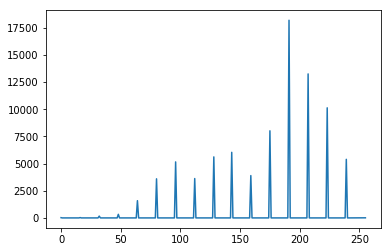

In [62]:
equ2 = cv2.normalize(denoised_gray2, None, 0, 255, cv2.NORM_MINMAX)
histgg = cv2.calcHist([equ2],[0],None,[256],[0,256])  
plt.plot(histgg) 
plt.show()

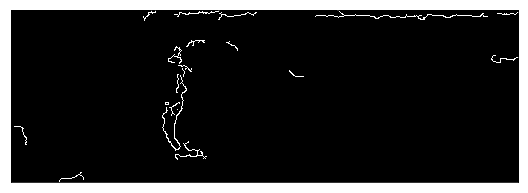

In [59]:
edges_adapt = cv2.Canny(equ2,65,220)
showImg(edges_adapt,"")

Calcul thresold Canny
https://stackoverflow.com/questions/4292249/automatic-calculation-of-low-and-high-thresholds-for-the-canny-operation-in-open

http://www.kerrywong.com/2009/05/07/canny-edge-detection-auto-thresholding/

### A voir

https://www.researchgate.net/post/How_to_have_uniform_intensity_on_non-uniform_illuminated_image

#### FFT

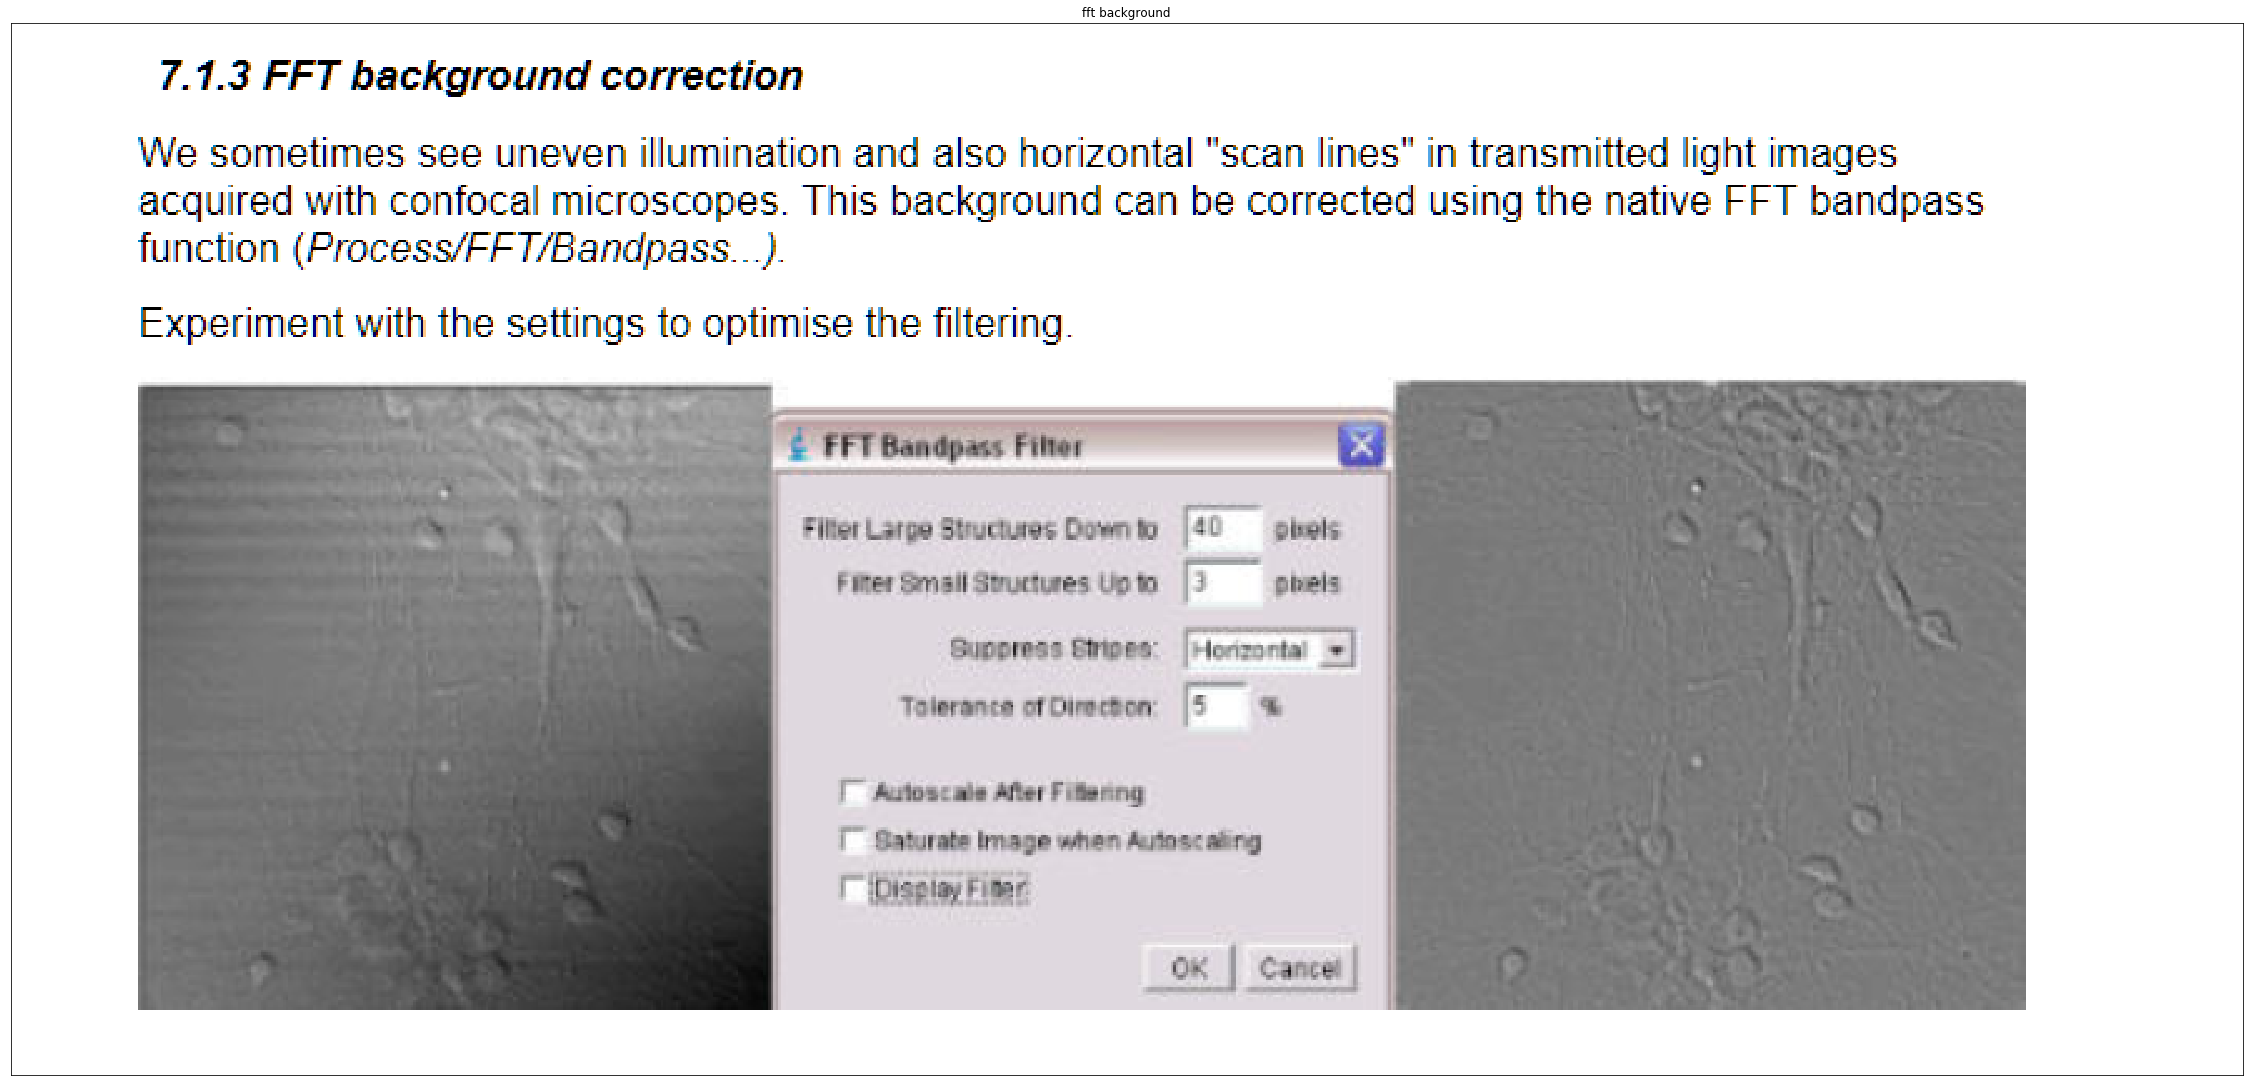

In [28]:
plt.figure(figsize=(40,40))
plt.title("fft background"), plt.xticks([]), plt.yticks([])
plt.imshow(cv2.imread("fft.png"),"gray")

* check for periodic noise
* apply low filtering with fft

#### Flat Fielding

#### Homomorphic filtering

#### Background Segmentation
p19-20
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.187.7787&rep=rep1&type=pdf

+ PTT

#### Noise level function (NLF)

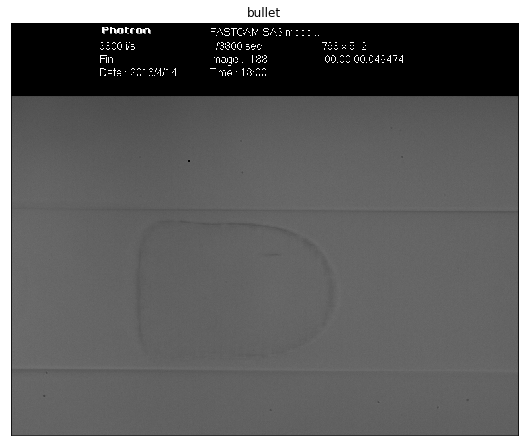

In [29]:
bullet = cv2.imread("new_data/bullet.tif")
showImg(bullet,"bullet")

In [30]:
bullet.shape

(624, 768, 3)

In [1]:
showImg(bullet[120:624,0:768],"crop")
showImg(cv2.Canny(bullet[120:624,0:768],0,220),"")

NameError: name 'showImg' is not defined